In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
city_df = pd.read_csv(city_data_to_load)
ride_data_to_load = "data/ride_data.csv"
ride_df = pd.read_csv(ride_data_to_load)

In [3]:
#City data
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
#Ride data
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
# Combine the data into a single dataset
city_ride_df = pd.merge(ride_df, city_df, how="left", on=["city"])

In [6]:
# Display the data table for preview
city_ride_df.sort_values(by=['type'], ascending=True).head()

,city,date,fare,ride_id,driver_count,type
2374,Newtonview,2018-04-25 10:20:13,55.84,9990581345298,1,Rural
2282,South Marychester,2018-03-27 12:07:50,34.42,4230150157651,1,Rural
2283,Penaborough,2018-04-27 06:02:10,38.33,547013925055,6,Rural
2284,New Ryantown,2018-04-18 19:43:54,42.97,230914178346,2,Rural
2285,North Jaime,2018-04-04 13:13:40,51.83,9116047435376,1,Rural


## Bubble Plot of Ride Sharing Data

In [7]:
# Obtain the x and y coordinates for rural
rural_df = city_ride_df[city_ride_df["type"] == "Rural"]
rural_ride_count = rural_df.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_df.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_df.groupby(["city"]).mean()["driver_count"]

In [8]:
# Obtain the x and y coordinates for suburban
suburban_df = city_ride_df[city_ride_df["type"] == "Suburban"]
suburban_ride_count = suburban_df.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_df.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_df.groupby(["city"]).mean()["driver_count"]

In [9]:
# Obtain the x and y coordinates for urban
urban_df = city_ride_df[city_ride_df["type"] == "Urban"]
urban_ride_count = urban_df.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_df.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_df.groupby(["city"]).mean()["driver_count"]

Text(22,16,'Size of circle = number of drivers')

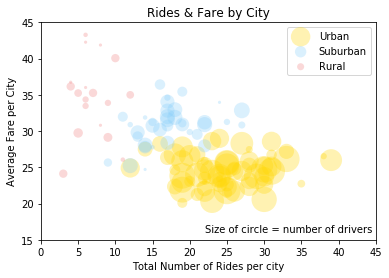

In [10]:
# Build the scatter plots for urban
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=urban_driver_count*10, c="gold", 
            edgecolor="none", linewidths=1, marker="o", 
            alpha=0.3, label="Urban")
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=suburban_driver_count*10, c="lightskyblue", 
            edgecolor="none", linewidths=1, marker="o", 
            alpha=0.3, label="Suburban")
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=rural_driver_count*10, c="lightcoral", 
            edgecolor="none", linewidths=1, marker="o", 
            alpha=0.3, label="Rural")

# Incorporate the other graph properties

#x/y limits
plt.xlim(0, 45)
plt.ylim(15, 45)

# Create a legend
plt.legend(loc="best")
plt.title("Rides & Fare by City")
plt.xlabel("Total Number of Rides per city")
plt.ylabel("Average Fare per City")

# Incorporate a text label regarding circle size
plt.text(22, 16, s = "Size of circle = number of drivers")


In [11]:
# Save Figure
plt.savefig("../Images/avg_state_rain.png")

<Figure size 432x288 with 0 Axes>

## Total Fares by City Type

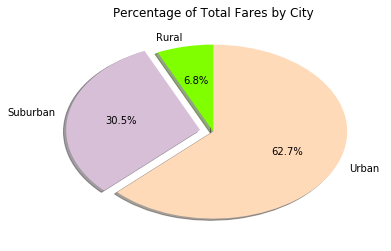

In [14]:
# Calculate Type Percents
total_fares = pd.DataFrame(city_ride_df.groupby(["type"]).sum()['fare'])

labels = ["Rural", "Suburban", "Urban"]
colors = ["chartreuse", "thistle", "peachpuff"]
explode = [0, 0.1, 0]

# Build Pie Chart
plt.pie(total_fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Percentage of Total Fares by City Type")

# Save Figure & Show Figure
plt.savefig("../Images/fares_by_city.png")

In [24]:
total_fares

,fare
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


## Total Rides by City Type

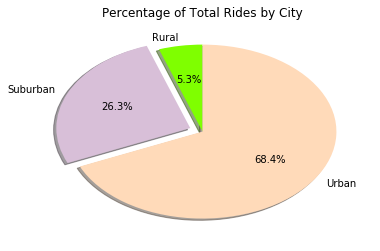

In [22]:
# Calculate Ride Percents
total_rides = pd.DataFrame(city_ride_df.groupby(["type"]).count()['ride_id'])

labels = ["Rural", "Suburban", "Urban"]
colors = ["chartreuse", "thistle", "peachpuff"]
explode = [0, 0.1, 0]

# Build Pie Chart
plt.pie(total_rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Percentage of Total Rides by City Type")

# Save Figure & Show Figure
plt.savefig("../Images/rides_by_city.png")

In [23]:
total_rides

,ride_id
type,
Rural,125
Suburban,625
Urban,1625


## Total Drivers by City Type

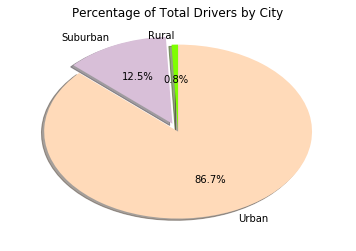

In [25]:
# Calculate Driver Percents
total_drivers = pd.DataFrame(city_ride_df.groupby(["type"]).sum()['driver_count'])

labels = ["Rural", "Suburban", "Urban"]
colors = ["chartreuse", "thistle", "peachpuff"]
explode = [0, 0.1, 0]

# Build Pie Chart
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Percentage of Total Drivers by City Type")

# Save Figure & Show Figure
plt.savefig("../Images/drivers_by_city.png")

In [20]:
total_drivers

,driver_count
type,
Rural,537
Suburban,8570
Urban,59602
